In [6]:
%matplotlib inline

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import linregress

# matplotlib plot params
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.grid"] = True

# Figures des simulations du Méthane

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

Ce notebook est utilisé pour produire des figures à partir des simulations du métahne.

## Radial Distribution Function (RDF)

La fonction de distribution radiale est un histogramme des distances entre molécules de méthane. Elle donne le nombre de molécules situées entre deux sphères de rayon $R$ et $R +dR$ centrée sur une molécule donnée. Le résultat est une moyenne sur l'ensemble des molécules et sur la durée de la simulation.

La figure ci-dessous, représente la RDF pour trois simulations réalisées à des températures différentes, pour une pression de 40 atm. Dans ces simulations le méthane est solide (T = 50 K), liquide (T = 160 K) ou gazeux (T = 400 K). À 40 atm, les températures de changement d'états sont de 90 K pour la fusion et 187 K pour l'ébulition [(Source NIST)](https://webbook.nist.gov/cgi/cbook.cgi?ID=74-82-8).

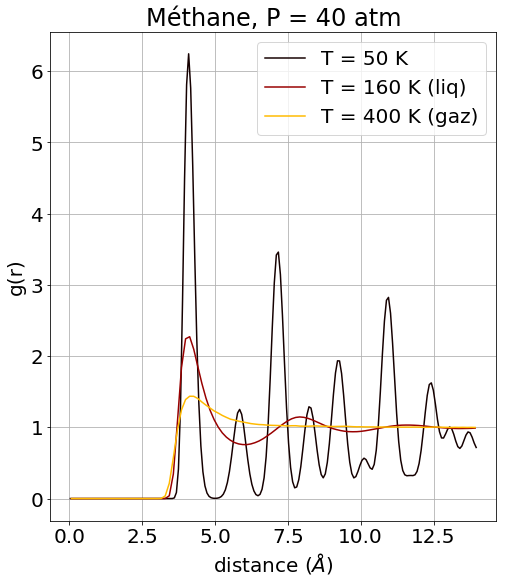

In [3]:
norm = plt.Normalize(40, 600)
cmap = plt.cm.hot
plt.figure(figsize=(8, 9))

x50, rdf50 = np.loadtxt("../simulations/Methane/50K/rdf.dat", usecols=(1, 2), unpack=True, skiprows=4)
plt.plot(x50, rdf50, color=cmap(norm(50)), label="T = 50 K")

x160, rdf160 = np.loadtxt("../simulations/Methane/rdf.160.dat", usecols=(1, 2), unpack=True)
plt.plot(x160, rdf160, color=cmap(norm(160)), label="T = 160 K (liq)")

x400, rdf400 = np.loadtxt("../simulations/Methane/rdf.400.dat", usecols=(1, 2), unpack=True)
plt.plot(x400, rdf400, color=cmap(norm(400)), label="T = 400 K (gaz)")

plt.xlabel("distance ($\AA$)")
plt.ylabel("g(r)")
plt.title("Méthane, P = 40 atm")
plt.legend()
plt.savefig("../slides/img/rdf_methane.pdf");

## Methane 300 K

Ci-dessous, sont représentés l'évolution en fonction du temps de la température et de la taille de la boîte de simulation. La courbe jaune représente la phase d'équilibration, la courbe bleu représente la phase de production de résultats et la courbe rouge représente la moyenne de la grandeur considérée. 

Ces figures illustrent la notion d'équilibre thermodynamique caractérisé par des fluctuations autour d'une valeur d'équilibre.

In [4]:
step, temp, vol = np.loadtxt("../simulations/Methane/300K/thermo.dat", 
                             unpack=True, usecols=(0, 1, 3))
step_eq, temp_eq, vol_eq = np.loadtxt("../simulations/Methane/300K/thermo_eq.dat", 
                                      unpack=True, usecols=(0, 1, 3))
step_ave, temp_ave, vol_ave = np.loadtxt("../simulations/Methane/300K/thermo_ave.dat", 
                                         unpack=True, usecols=(0, 1, 3))

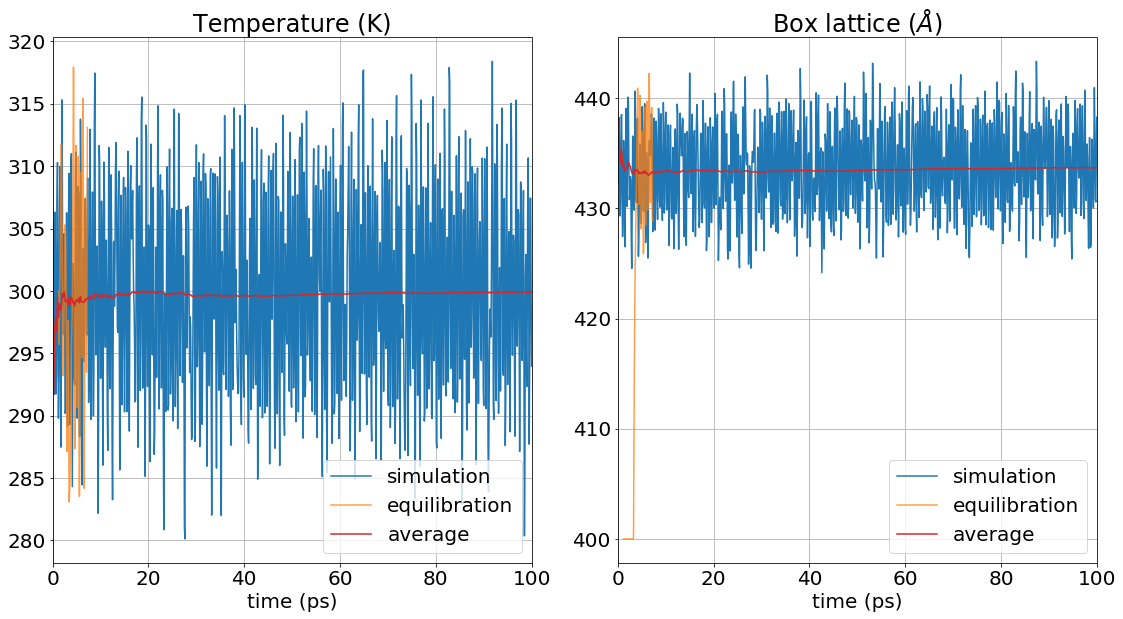

In [5]:
dt = 2e-3 # ps

plt.figure(figsize=(16, 9))

plt.subplot(121)
plt.plot(step * dt, temp, label="simulation")
plt.plot(step_eq * dt, temp_eq,  alpha=.75, label="equilibration")
plt.plot(step_ave * dt, temp_ave, color="C3", label="average")
plt.xlim(0, 100)
plt.xlabel("time (ps)")
plt.title("Temperature (K)")
plt.legend()

plt.subplot(122)
plt.plot(step * dt, vol**(1/3), label="simulation")
plt.plot(step_eq * dt, vol_eq**(1/3), alpha=.75, label="equilibration")
plt.plot(step_ave * dt, vol_ave**(1/3), color="C3", label="average")
plt.title("Box lattice ($\AA$)")
plt.xlabel("time (ps)")
plt.xlim(0, 100)
plt.legend()

plt.tight_layout()
plt.savefig("../slides/img/sim300K.pdf")

## Fusion du Methane (melting)

Dans cette simulation, la pression est fixée à 1 atmosphere. On démarre avec une boîte de méthane à l'état solide à 50 K. Après 20 ps de simulation, on chauffe le système de 50 K à 130 K pendant 20 ps, puis on maintient cette température de 130 K pendant 40 ps. Dans le même temps, la masse volumique du système chute de 0.53 à 0.39 g.cm$^{-1}$. Sous 1 atmosphère, la température de fusion du méthane est de 91 K, la température d'ébulition est de 112 K.

In [6]:
data = np.loadtxt("../simulations/Methane/Fusion/thermo.dat", unpack=True)

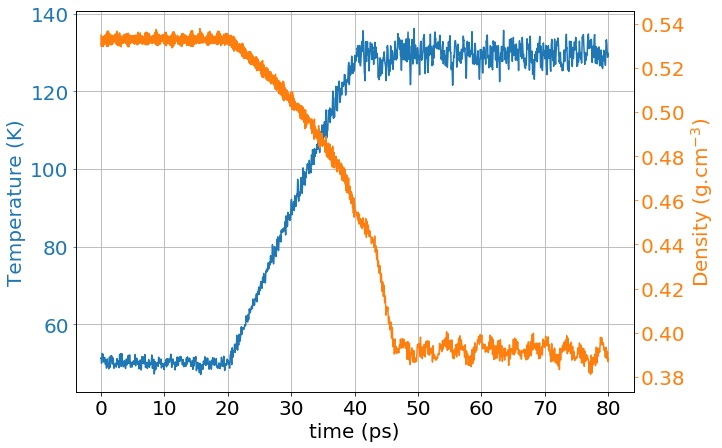

In [7]:
dt = 2e-3 # ps

fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(data[0] * dt, data[1], color="C0", label="temperature")
ax1.set_xlabel("time (ps)")
ax1.set_ylabel("Temperature (K)", color="C0")
ax1.tick_params(axis="y", colors="C0")

ax2 = ax1.twinx()
ax2.plot(data[0] * dt, data[4], label="density", color="C1")
ax2.set_ylabel("Density (g.cm$^{-3}$)", color="C1")
ax2.tick_params(axis="y", colors="C1")
ax2.grid(False)

plt.savefig("../slides/img/melting.pdf", bbox_inches="tight")

# Mean Square Displacement (MSD)

Le déplacement carré moyen (MSD) est relié au coefficient de diffusion, D, par la relation d'Einstein.

$$ 2tD = \frac{1}{3N} \left\langle\left( r(t) - r(0)\right)^2 \right\rangle_{NPT}$$

Le coefficient de diffusion est une fonction de la température.

T = 100 K  D = 0.0238 cm2/s   r^2 = 0.99294
T = 200 K  D = 0.1086 cm2/s   r^2 = 0.99541
T = 300 K  D = 0.2255 cm2/s   r^2 = 0.99591
T = 400 K  D = 0.3789 cm2/s   r^2 = 0.99621


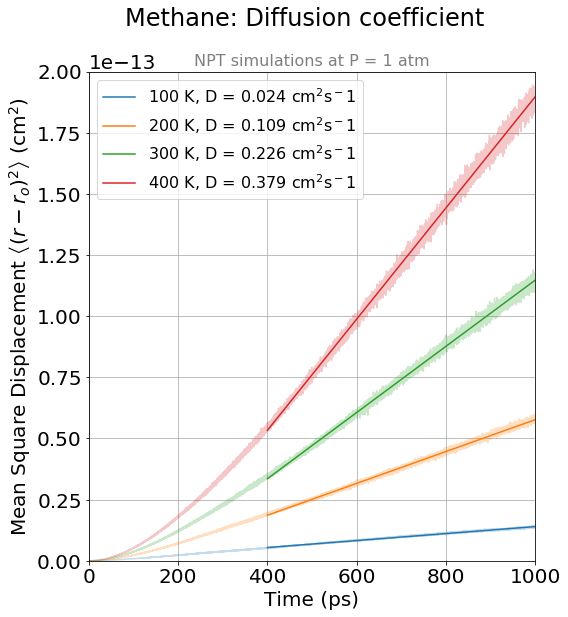

In [64]:
dt = 2e-15   # s

plt.figure(figsize=(8, 9))

i = 0
for temp in [100, 200, 300, 400]:
    filename = f"../simulations/Methane/datas/msd.{temp:3d}.dat"
    steps, msd = np.loadtxt(filename, unpack=True)
    
    time = steps * dt  # s
    start = 2000
    a, b, r, pval, stderr = linregress(time[start:], msd[start:] * 1e-16)
    print(f"T = {temp} K  D = {a / 6:.4f} cm2/s   r^2 = {r**2:.5f}")

    plt.plot(time * 1e12, msd * 1e-20, alpha=.25, color=f"C{i}")
    plt.plot(time[start:] * 1e12, (a * time[start:] + b) * 1e-4, color=f"C{i}",
             label=f"{temp} K, D = {a / 6:.3f} cm$^2$s$^{-1}$")
    i += 1
    
plt.xlabel("Time (ps)")
plt.ylabel(r"Mean Square Displacement $\left\langle (r - r_o)^2 \right\rangle$ (cm$^2$)")
plt.suptitle("Methane: Diffusion coefficient")
plt.title("NPT simulations at P = 1 atm", color="C7", fontsize=16)
plt.legend(fontsize=16)
plt.xlim(0, 1000)
plt.ylim(0, 2e-13);
plt.savefig("../slides/img/diffusion_coeff.pdf", bbox_inches="tight")

Les résultats ci-dessous sont en bon accord avec les valeurs mesurées expérimentalement (Edward B. Winn, *Phys. Rev.* 80, **1950**, 1024-1027):

![PRB](./methane_diffusion.png)

La figure ci-dessous représente le déplacement carré moyen (MSD) des molécules de méthane pour une température de 50 K, méthane solide, et une température de 100 K, méthane liquide. On remarque que le MSD est constant, en moyenne, dans le cas du solide. Ceci est cohérent avec la structure solide dans laquelle les molécules de méthane fluctuent autour d'une position d'équilibre. Dans le cas d'un liquide, on obtient un comportement diffusif, pour lequel le déplacement carré moyen est proportionnel au temps.

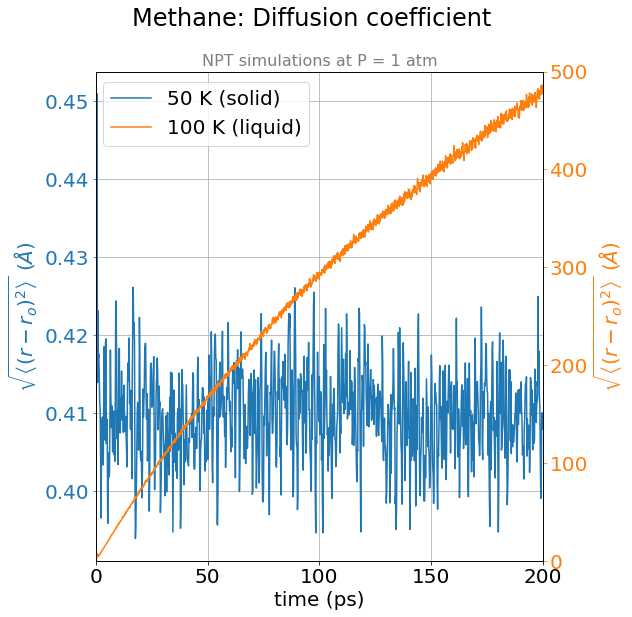

In [104]:
dt = 2.e-3 # ps

fig, ax1 = plt.subplots(figsize=(8, 9))

steps, msd = np.loadtxt("../simulations/Methane/datas/msd.50.dat", unpack=True)
ax1.plot(steps * dt, np.sqrt(msd), label="50 K (solid)")
ax1.set_xlim(0, 200)
ax1.set_xlabel("time (ps)")
ax1.set_ylabel(r"$\sqrt{\left\langle (r - r_o)^2 \right\rangle}$ ($\AA$)", color="C0")
ax1.tick_params(axis="y", colors="C0")

ax2 = ax1.twinx()
steps, msd = np.loadtxt("../simulations/Methane/datas/msd.100.dat", unpack=True)
ax2.plot(steps * dt, np.sqrt(msd), color="C1", label="100 K (liquid)")
ax2.set_ylim(0, 500)

ax2.set_ylabel(r"$\sqrt{\left\langle (r - r_o)^2 \right\rangle}$ ($\AA$)", color="C1")
ax2.tick_params(axis="y", colors="C1")

ax2.grid(False)
fig.legend(bbox_to_anchor=(0.5, 1), bbox_transform=ax1.transAxes)

fig.suptitle("Methane: Diffusion coefficient")
ax1.set_title("NPT simulations at P = 1 atm", color="C7", fontsize=16);
